## Classification

In [36]:
library(ISLR)
library(ggplot2)
options(repr.plot.width=8, repr.plot.height=6)

In [37]:
data(Default)

In [38]:
str(Default)

'data.frame':	10000 obs. of  4 variables:
 $ default: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ student: Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ balance: num  730 817 1074 529 786 ...
 $ income : num  44362 12106 31767 35704 38463 ...


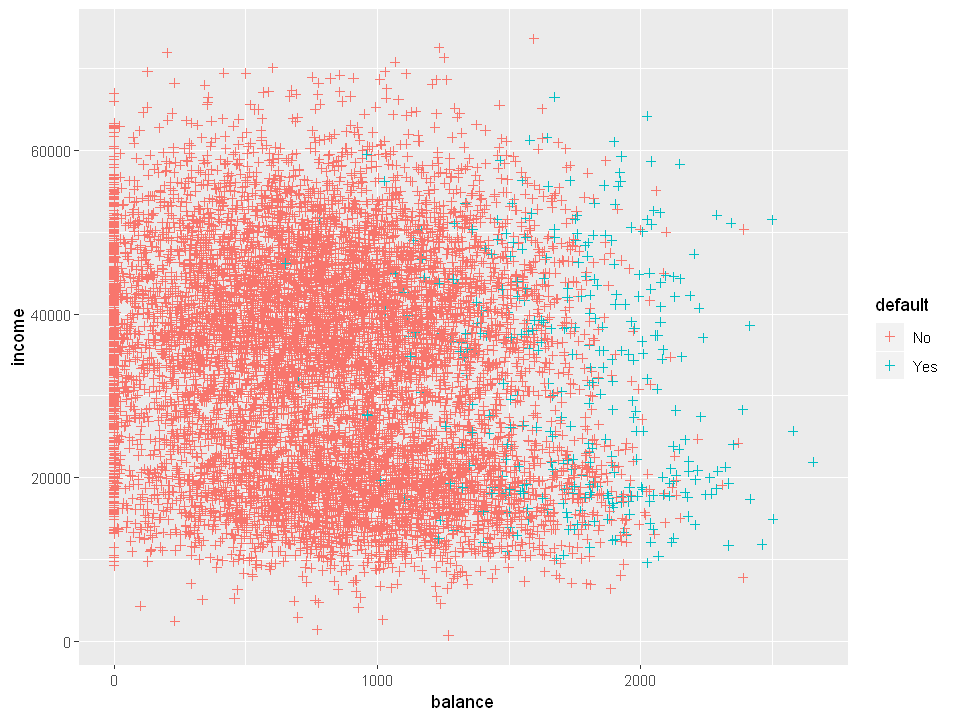

In [39]:
ggplot(Default, aes(x = balance, y = income, color = default)) + geom_point(shape = 3)

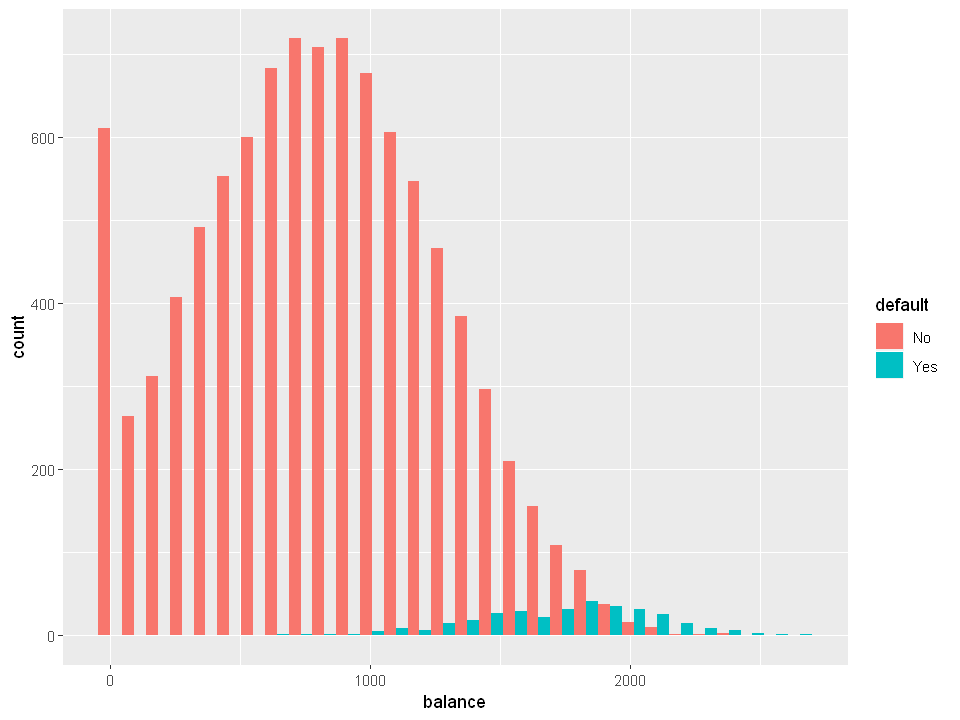

In [40]:
ggplot(Default, aes(x = balance, group = default, fill = default)) + geom_histogram(position = 'dodge', bins = 30)

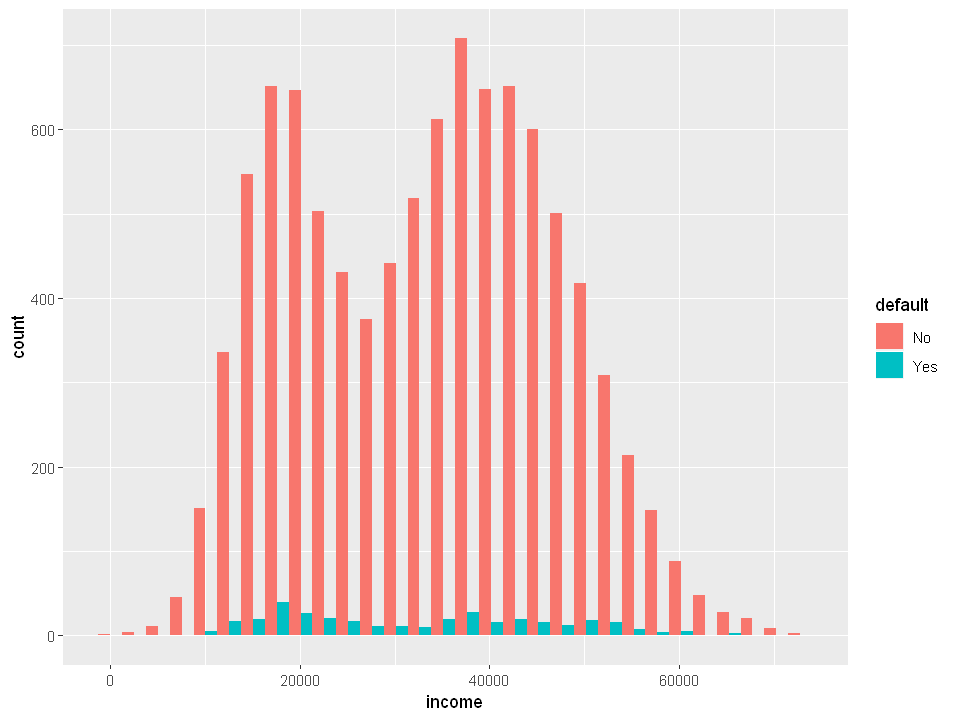

In [41]:
ggplot(Default, aes(x = income, group = default, fill = default)) + geom_histogram(position = 'dodge', bins = 30)

### Odds

$$ \frac{p}{1 - p} = e^{\beta_0 + \beta_1 X} $$

### Multiclass classification

Generally people do not use logistic regression for multiclass classification but use discriminant analysis instead.

### Bayes Classifier 

This is the best in theory one can achieve. However, two pieces of informations is needed. 
- prior probability of each class
- probability distribution of each class


### Lienar discriminant

The name stems from the fact that the discriminant function is linear in $x$.
$$\delta_k(X) = X \cdot \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} + log(\pi_k) $$ 

To sum up, linear discrimiant analysis assumes:
- The classes should be separable by their means
- All classes are gaussian distributed and share the same covariance matrix.

## Stock market data

In [42]:
str(Smarket)

'data.frame':	1250 obs. of  9 variables:
 $ Year     : num  2001 2001 2001 2001 2001 ...
 $ Lag1     : num  0.381 0.959 1.032 -0.623 0.614 ...
 $ Lag2     : num  -0.192 0.381 0.959 1.032 -0.623 ...
 $ Lag3     : num  -2.624 -0.192 0.381 0.959 1.032 ...
 $ Lag4     : num  -1.055 -2.624 -0.192 0.381 0.959 ...
 $ Lag5     : num  5.01 -1.055 -2.624 -0.192 0.381 ...
 $ Volume   : num  1.19 1.3 1.41 1.28 1.21 ...
 $ Today    : num  0.959 1.032 -0.623 0.614 0.213 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 2 2 1 2 2 2 1 2 2 2 ...


In [43]:
dim(Smarket)

[1] 1250    9

In [44]:
cor(Smarket[, -9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


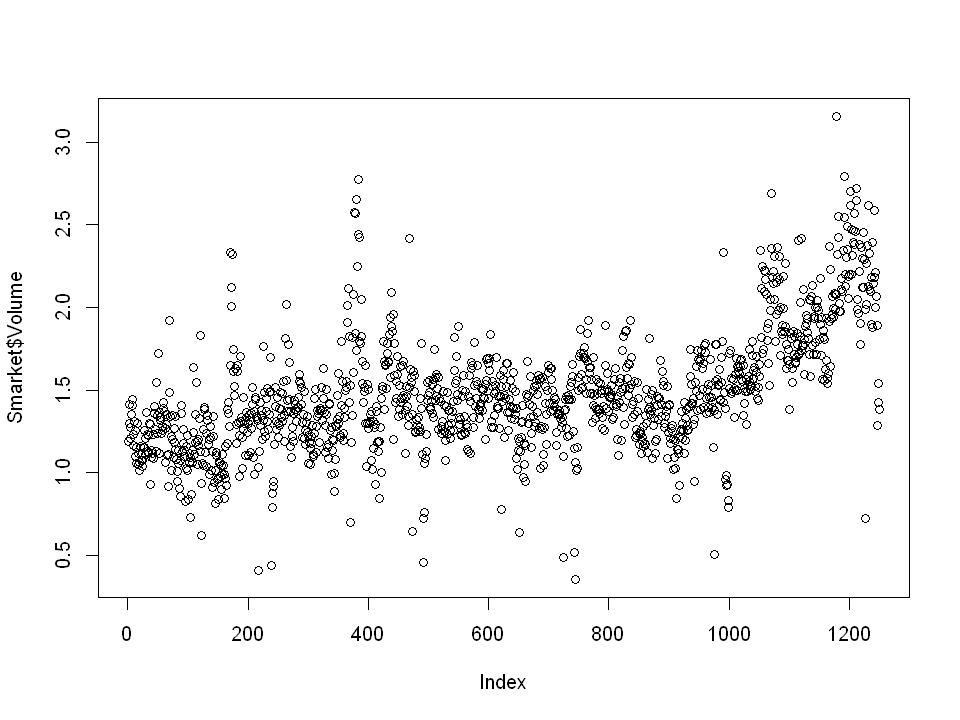

In [45]:
plot(Smarket$Volume)

### Logistic regression

In [46]:
glm.fit = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, family = binomial, data = Smarket)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [47]:
coef(glm.fit)

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

In [48]:
glm.probs = predict(glm.fit, type = 'response')
head(glm.probs)

1         2         3         4         5         6 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565

In [49]:
glm.pred = rep("Down", 1250)
glm.pred[glm.probs >= 0.5] = "Up"

In [50]:
table(glm.pred, Smarket$Direction)

        
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [51]:
train = (Smarket$Year < 2005)

### LDA

In [52]:
library(MASS)
lda.fit = lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

### QDA

In [53]:
qda.fit = qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

In [54]:
Smarket.2005 = Smarket[!train, ]
qda.class = predict(qda.fit, Smarket.2005)$class
table(qda.class, Smarket.2005$Direction)

         
qda.class Down  Up
     Down   30  20
     Up     81 121

### KNN

In [55]:
library(class)

In [56]:
train.X = cbind(Smarket$Lag1, Smarket$Lag2)[train, ]
test.X = cbind(Smarket$Lag1, Smarket$Lag2)[!train, ]
train.Direction = Smarket$Direction[train]

In [61]:
set.seed(233)
knn.pred = knn(train.X, test.X, train.Direction, k = 1)
table(knn.pred, Smarket.2005$Direction)

        
knn.pred Down Up
    Down   43 58
    Up     68 83

In [62]:
set.seed(233)
knn.pred = knn(train.X, test.X, train.Direction, k = 3)
table(knn.pred, Smarket.2005$Direction)

        
knn.pred Down Up
    Down   48 55
    Up     63 86

## Caravan insurance data

In [63]:
str(Caravan)

'data.frame':	5822 obs. of  86 variables:
 $ MOSTYPE : num  33 37 37 9 40 23 39 33 33 11 ...
 $ MAANTHUI: num  1 1 1 1 1 1 2 1 1 2 ...
 $ MGEMOMV : num  3 2 2 3 4 2 3 2 2 3 ...
 $ MGEMLEEF: num  2 2 2 3 2 1 2 3 4 3 ...
 $ MOSHOOFD: num  8 8 8 3 10 5 9 8 8 3 ...
 $ MGODRK  : num  0 1 0 2 1 0 2 0 0 3 ...
 $ MGODPR  : num  5 4 4 3 4 5 2 7 1 5 ...
 $ MGODOV  : num  1 1 2 2 1 0 0 0 3 0 ...
 $ MGODGE  : num  3 4 4 4 4 5 5 2 6 2 ...
 $ MRELGE  : num  7 6 3 5 7 0 7 7 6 7 ...
 $ MRELSA  : num  0 2 2 2 1 6 2 2 0 0 ...
 $ MRELOV  : num  2 2 4 2 2 3 0 0 3 2 ...
 $ MFALLEEN: num  1 0 4 2 2 3 0 0 3 2 ...
 $ MFGEKIND: num  2 4 4 3 4 5 3 5 3 2 ...
 $ MFWEKIND: num  6 5 2 4 4 2 6 4 3 6 ...
 $ MOPLHOOG: num  1 0 0 3 5 0 0 0 0 0 ...
 $ MOPLMIDD: num  2 5 5 4 4 5 4 3 1 4 ...
 $ MOPLLAAG: num  7 4 4 2 0 4 5 6 8 5 ...
 $ MBERHOOG: num  1 0 0 4 0 2 0 2 1 2 ...
 $ MBERZELF: num  0 0 0 0 5 0 0 0 1 0 ...
 $ MBERBOER: num  1 0 0 0 4 0 0 0 0 0 ...
 $ MBERMIDD: num  2 5 7 3 0 4 4 2 1 3 ...
 $ MBERARBG: num  5 0 0 

In [64]:
attach(Caravan)

In [65]:
# This is a imbalanced data set where most of the customers did not purchase the policy
summary(Purchase)

No  Yes 
5474  348

In [67]:
# Scale features since KNN depends on distance between data points
standardized.X = scale(Caravan[, -86])
var(standardized.X[, 1])

[1] 1

In [71]:
test = 1:1000
train.X = standardized.X[-test, ]
test.X = standardized.X[test, ]
train.y = Purchase[-test]
test.y = Purchase[test]
set.seed(233)
knn.pred = knn(train.X, test.X, train.y, k = 1)
table(knn.pred, test.y)

        test.y
knn.pred  No Yes
     No  874  49
     Yes  67  10

In [72]:
knn.pred = knn(train.X, test.X, train.y, k = 3)
table(knn.pred, test.y)

        test.y
knn.pred  No Yes
     No  922  54
     Yes  19   5

In [73]:
knn.pred = knn(train.X, test.X, train.y, k = 5)
table(knn.pred, test.y)

        test.y
knn.pred  No Yes
     No  930  55
     Yes  11   4